## Monte-Carlo method to do option pricing
Using Monte-Carlo method to do option pricing, we can get the price of the option by simulating the stock price in the future. The basic idea is to simulate the stock price in the future, and then calculate the payoff of the option. Finally, we can get the price of the option by averaging the payoff of the option.

In [2]:
# Import only the packages that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


### Simulate the stock price
We can simulate the stock price in the future by using the following formula:
$$S_T = S_0 \exp((r - \frac{1}{2}\sigma^2)T + \sigma \sqrt{T}Z)$$
where $S_T$ is the stock price at maturity, $S_0$ is the initial stock price, $r$ is the risk-free rate, $\sigma$ is the volatility of the underlying stock, $T$ is the time to maturity, and $Z$ is a random variable that follows the standard normal distribution. We can use the `np.random.standard_normal()` function to generate the random variable $Z$. The following function can be used to simulate the stock price in the future.

For the european option pricing, we only need to simulate the stock price at maturity. For the american option pricing, we need to simulate the stock price at each step. The following function can be used to simulate the stock price at each step.

In [3]:
# European option pricing
def european_option_pricing(S0, K, T, r, sigma, option_type, n_simulation):
    """
    S0: initial stock price
    K: strike price
    T: time to maturity
    r: risk-free rate
    sigma: volatility of the underlying stock
    option_type: 'call' or 'put'
    n_simulation: number of simulations
    """
    # Simulate the stock price at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(n_simulation))
    # Calculate the payoff of the option
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        raise ValueError("The option_type should be either 'call' or 'put'.")
    # Calculate the price of the option
    price = np.exp(-r * T) * np.sum(payoff) / n_simulation
    return price

In [37]:
# American option pricing
def american_option_pricing(S0, K, T, r, sigma, option_type, n_simulation, n_steps):
    """
    S0: initial stock price
    K: strike price
    T: time to maturity
    r: risk-free rate
    sigma: volatility of the underlying stock
    option_type: 'call' or 'put'
    n_simulation: number of simulations
    n_steps: number of steps in each simulation
    """
    # Calculate the time interval
    delta_t = T / n_steps
    # Simulate the stock price at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * delta_t + sigma * np.sqrt(delta_t) * np.random.standard_normal((n_simulation, n_steps)))
    # Calculate the payoff of the option
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        raise ValueError("The option_type should be either 'call' or 'put'.")
    # Calculate the price of the option
    price = np.exp(-r * T) * np.sum(payoff) / n_simulation
    return price

In [38]:
# Testing on real data from Yahoo Finance
import yfinance as yf
# Get the data of Apple
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
# Calculate the daily return
data['daily_return'] = data['Adj Close'].pct_change()
# Calculate the volatility
sigma = data['daily_return'].std() * np.sqrt(252)
# Calculate the risk-free rate
r = 0.01
# Calculate the initial stock price
S0 = data['Adj Close'][-1]
# Strike price
K = S0 * 1.1
# Time to maturity
T = 1
# Number of simulations
n_simulation = 100000
# Number of steps
n_steps = 100

[*********************100%%**********************]  1 of 1 completed


In [39]:
# Calculate the price of the call option
european_option_pricing(S0, K, T, r, sigma, 'call', n_simulation)

13.85752568065067

In [40]:
# Calculate the price of the put option
european_option_pricing(S0, K, T, r, sigma, 'put', n_simulation)

25.54353221469826

In [41]:
# Calculate the price of the call option
american_option_pricing(S0, K, T, r, sigma, 'call', n_simulation, n_steps)

0.5647306921497616

In [42]:
# Calculate the price of the put option
american_option_pricing(S0, K, T, r, sigma, 'put', n_simulation, n_steps)

1280.199535650309

In [43]:
# Modify the function to return the price of the option at each step
def american_option_pricing(S0, K, T, r, sigma, option_type, n_simulation, n_steps):
    """
    S0: initial stock price
    K: strike price
    T: time to maturity
    r: risk-free rate
    sigma: volatility of the underlying stock
    option_type: 'call' or 'put'
    n_simulation: number of simulations
    n_steps: number of steps in each simulation
    """
    # Calculate the time interval
    delta_t = T / n_steps
    # Simulate the stock price at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * delta_t + sigma * np.sqrt(delta_t) * np.random.standard_normal((n_simulation, n_steps)))
    # Calculate the payoff of the option
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        raise ValueError("The option_type should be either 'call' or 'put'.")
    # Calculate the price of the option
    price = np.exp(-r * T) * np.sum(payoff) / n_simulation
    # Calculate the price of the option at each step
    price_list = []
    for i in range(n_steps):
        # Calculate the time to maturity
        T_i = T - i * delta_t
        # Calculate the discount factor
        discount_factor = np.exp(-r * T_i)
        # Calculate the payoff of the option at each step
        if option_type == 'call':
            payoff_i = np.maximum(ST[:, i] - K, 0)
        elif option_type == 'put':
            payoff_i = np.maximum(K - ST[:, i], 0)
        else:
            raise ValueError("The option_type should be either 'call' or 'put'.")
        # Calculate the price of the option at each step
        price_i = discount_factor * np.sum(payoff_i) / n_simulation
        price_list.append(price_i)
    return price, price_list

In [69]:
# Calculate the price of the call option
price, price_list = american_option_pricing(S0, K*0.9, T, r, sigma, 'call', n_simulation, n_steps)

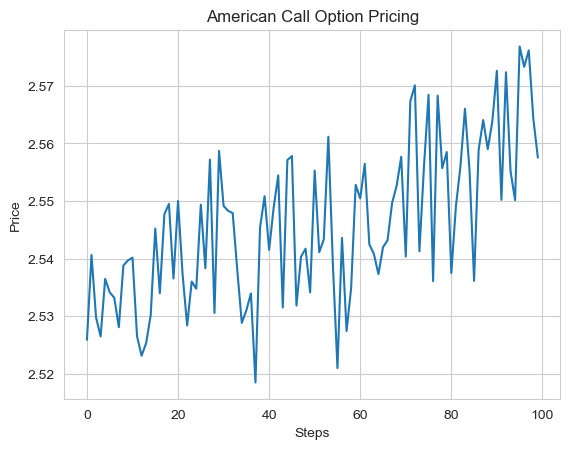

In [70]:
# Plot the price of the call option at each step
plt.plot(price_list)
plt.xlabel('Steps')
plt.ylabel('Price')
plt.title('American Call Option Pricing')
plt.show()